In [7]:
import numpy as np
from skimage import color, io, img_as_float
import matplotlib.pyplot as plt

In [8]:
# Load sample 
image = io.imread("gambar.jpg")  
image = color.rgb2gray(image)
image = img_as_float(image)

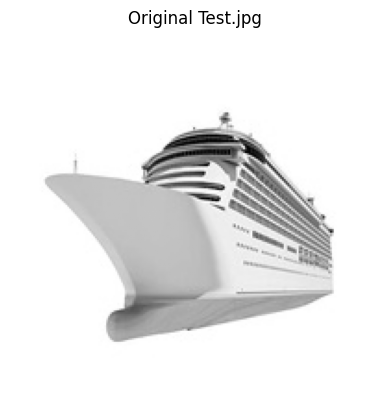

In [9]:
plt.imshow(image, cmap="gray")
plt.title("Original Test.jpg")
plt.axis("off")
plt.show()

In [10]:
def convolution2d(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))  # rotate 180 derajat
    m, n = kernel.shape
    y, x = image.shape
    pad_h, pad_w = m // 2, n // 2
    
    # padding
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    
    # hasil konvolusi
    output = np.zeros_like(image)
    
    for i in range(y):
        for j in range(x):
            region = padded[i:i+m, j:j+n]
            output[i, j] = np.sum(region * kernel)
    return output

In [32]:
# Define kernels
#identity filter
identity_kernel = np.array([[0,0,0],
                     [0,1,0],
                     [0,0,0]])
shift_left_kernel = np.array([[0,0,0],
                     [1,0,0],
                     [0,0,0]])

mean_kernel = np.ones((3,3)) / 9.0
#sharp
double_kernel = np.array([[0,0,0],
                     [0,2,0],
                     [0,0,0]])
sharpen_kernel = double_kernel - mean_kernel

#smooth kernel
smooth_kernel = np.array([[1,2,1],
                            [2,4,2],
                            [1,2,1]]) / 16.0
smooth_5x5_kernel = np.ones((5,5)) / 25.0

high_pass = np.array([[ -1, -1, -1],
                      [ -1,  8, -1],
                      [ -1, -1, -1]])
low_pass = np.array([[1,1,1],
                    [1,1,1],
                    [1,1,1]])/ 9.0

laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

In [33]:
# Apply filters
# linear
indentity_img = convolution2d(image, identity_kernel)
shift_left_img = convolution2d(image, shift_left_kernel)
mean_img = convolution2d(image, mean_kernel)
sharpen_img = convolution2d(image, sharpen_kernel)
# smooting
smooth_img = convolution2d(image, smooth_kernel)
smooth_5x5_img = convolution2d(image, smooth_5x5_kernel)
detail_img = image-smooth_5x5_img

high_pass_img = convolution2d(image, high_pass)
low_pass_img = convolution2d(image, low_pass)
laplacian_img = convolution2d(image, laplacian_kernel)

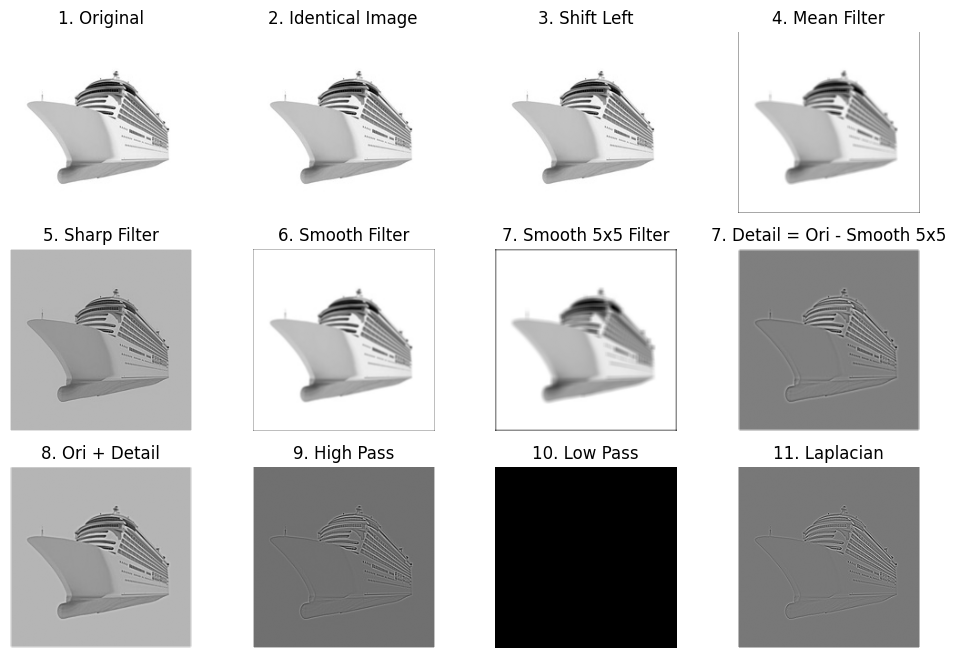

In [34]:
# Show results
fig, ax = plt.subplots(3,4, figsize=(12,8))
ax[0,0].imshow(image, cmap='gray'); ax[0,0].set_title("1. Original"); ax[0,0].axis("off")
#linear filter
ax[0,1].imshow(indentity_img, cmap='gray'); ax[0,1].set_title("2. Identical Image"); ax[0,1].axis("off")
ax[0,2].imshow(indentity_img, cmap='gray'); ax[0,2].set_title("3. Shift Left"); ax[0,2].axis("off")
ax[0,3].imshow(mean_img, cmap='gray'); ax[0,3].set_title("4. Mean Filter"); ax[0,3].axis("off")
ax[1,0].imshow(sharpen_img, cmap='gray'); ax[1,0].set_title("5. Sharp Filter"); ax[1,0].axis("off")
#smooth
ax[1,1].imshow(smooth_img, cmap='gray'); ax[1,1].set_title("6. Smooth Filter"); ax[1,1].axis("off")
ax[1,2].imshow(smooth_5x5_img, cmap='gray'); ax[1,2].set_title("7. Smooth 5x5 Filter"); ax[1,2].axis("off")
ax[1,3].imshow(detail_img, cmap='gray'); ax[1,3].set_title("7. Detail = Ori - Smooth 5x5"); ax[1,3].axis("off")
ax[2,0].imshow(image+detail_img, cmap='gray'); ax[2,0].set_title("8. Ori + Detail"); ax[2,0].axis("off")

ax[2,1].imshow(high_pass_img, cmap='gray'); ax[2,1].set_title("9. High Pass"); ax[2,1].axis("off")
ax[2,2].imshow(low_pass_img, cmap='gray'); ax[2,2].set_title("10. Low Pass"); ax[2,2].axis("off")
ax[2,3].imshow(laplacian_img, cmap='gray'); ax[2,3].set_title("11. Laplacian"); ax[2,3].axis("off")
plt.show()